[Numpy Basics](https://github.com/m3m0ry/numpy-basics)

# numpy - C's speed at Python's convenience
- THE package for scientific computing
- provides fast operatations on multidimensional arrays
- basis of many scientific packages: scipy, matplotlib, opencv, tensorflow, ...
- drop in replacements: cupy, nclpy, ...

In [1]:
import numpy as np

In [2]:
# questions: Yes

## Simple speed comparison
Numpy is faster then vanilla python by ~2-3 orders of magnitude.

In [3]:
L = range(10000)
%timeit [i**2 for i in L]

2.61 ms ± 78.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
a = np.arange(10000)
%timeit a**2

6.03 µs ± 69.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## np.ndarray
- fixed size
- [fixed datatype](https://numpy.org/doc/stable/user/basics.types.html): (float64, float32, int32, uint64, ...)
- [Array Creation](https://numpy.org/doc/stable/user/basics.creation.html)

### Array Creation
(because we need to start with something)

There are multiple ways of creating an array. Numpy provides functions for common cases.

Lists of integers and floats

In [5]:
a = np.array([0, 1, 2, 3])
print(f'{a=}')
print(f'{a.dtype=}')
print(f'{a.size=}')
print(f'{a.itemsize=}')

a=array([0, 1, 2, 3])
a.dtype=dtype('int64')
a.size=4
a.itemsize=8


In [6]:
b = np.array([0.0, 1.1, 2.2, 3.3])
print(f'{b=}')
print(f'{b.dtype=}')
print(f'{b.size=}')
print(f'{b.itemsize=}')

b=array([0. , 1.1, 2.2, 3.3])
b.dtype=dtype('float64')
b.size=4
b.itemsize=8


Mixed List and Fixed Type

In [7]:
a = np.array([0, 1, 2.2, 3.3])
print(f'{a=}')
print(f'{a.dtype=}')
print(f'{a.size=}')
print(f'{a.itemsize=}')

a=array([0. , 1. , 2.2, 3.3])
a.dtype=dtype('float64')
a.size=4
a.itemsize=8


In [8]:
b = np.array([0, 1, 2.2, 3.3], dtype=np.int8)
print(f'{b=}')
print(f'{b.dtype=}')
print(f'{b.size=}')
print(f'{b.itemsize=}')

b=array([0, 1, 2, 3], dtype=int8)
b.dtype=dtype('int8')
b.size=4
b.itemsize=1


Range & linspace

In [9]:
np.arange(2.05, 2.5, 0.1)

array([2.05, 2.15, 2.25, 2.35, 2.45])

In [10]:
np.linspace(2.05, 2.5, 5)

array([2.05  , 2.1625, 2.275 , 2.3875, 2.5   ])

2D Arrays: eye, diag, vander

nD Arrays: zeros, ones, random.rand, fromfunction, ...

In [11]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [12]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [13]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [14]:
np.arange(9).reshape(3,3).shape

(3, 3)

## Array handling
### Indexing, slicing, masks, views, ...
- [Slicing and Indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#basic-slicing-and-indexing)

### Indexing

Indexing behaves like one would expect. Use negative numbers to access the array from opposite direction.

In [15]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [16]:
a[0,0]  # first element

0

In [17]:
a[-1,-1]  # last element

8

In [18]:
a[1,1] == a[-2,-2]

True

### [Slicing](http://scipy-lectures.org/_images/numpy_indexing.png)

Slicing is one of the most used feature of numpy. It is used for selecting specific ranges and computation which cannot be done with provided functions.

In [19]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
a[1:,1:]

array([[4, 5],
       [7, 8]])

In [21]:
a[:, :1]

array([[0],
       [3],
       [6]])

In [22]:
a[0]

array([0, 1, 2])

In [23]:
a[::2, 1::2]

array([[1],
       [7]])

### Index Array

Indexing an array with another array is usefull for more complex operations, where an algorithm determines, which indexes are affected

In [24]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [25]:
a[np.array([[0, 2]]), np.array([[1, 1]])]

array([[1, 7]])

## Mask

With a boolean operation we can also create masks of arrays.

In [26]:
a > 5

array([[False, False, False],
       [False, False, False],
       [ True,  True,  True]])

In [27]:
a[a>5]

array([6, 7, 8])

### Newaxis

In [28]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [29]:
b[:, np.newaxis]

array([[1],
       [2],
       [3]])

## Ellipsis

Ellipsis is an Python object, which numpy uses as a place holder for as many ":" as needed

In [30]:
c = np.arange(81).reshape(3,3,3,3)

In [31]:
c[...,0,0]

array([[ 0,  9, 18],
       [27, 36, 45],
       [54, 63, 72]])

In [32]:
np.all(c[..., 0, 0] == c[:, :, 0, 0])

True

## Views

Slicing and transposition (usually) creates a view. Views however don't copy the underlying content.

In [33]:
a = np.zeros((3,3))
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [34]:
b = a[:2,:2]
b

array([[0., 0.],
       [0., 0.]])

In [35]:
b[0,0] = 1.  # Changes a as well!!!
b

array([[1., 0.],
       [0., 0.]])

In [36]:
a

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [37]:
a.T[2,1] = 42  # Changes a as well!!!
a

array([[ 1.,  0.,  0.],
       [ 0.,  0., 42.],
       [ 0.,  0.,  0.]])

## Array copying

In [38]:
a = np.zeros((3,3))
b = a.copy()
b[0,0] = 42
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [39]:
b = np.copy(a)
b[0,0] = 42
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

## Numerical operations
### Matrix Multiplication

In [40]:
a = np.ones((3,3))
b = np.ones((3,3))
np.dot(a,b)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [41]:
a @ b

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [42]:
a * b  # !!! This is an elementwise multiplication

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [43]:
np.cos(a)

array([[0.54030231, 0.54030231, 0.54030231],
       [0.54030231, 0.54030231, 0.54030231],
       [0.54030231, 0.54030231, 0.54030231]])

## Functions
`numpy` provides all kinds of functions!

Instead of implementing your own, which is potentionally wrong, use your time to read the documentation.

**RTFM**

## Reductions

In [44]:
a = np.arange(9).reshape(3,3)
a.sum()

36

In [45]:
a.max()

8

In [46]:
np.any(np.array([True, True, False]))

True

In [47]:
np.median(a)

4.0

## Comparison

In [48]:
a = np.ones((3,3))
a == a

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [49]:
np.array_equal(a, a)

True

In [50]:
np.all(a == a)

True

Use `np.allclose` for comparing floating point numbers!

In [51]:
np.allclose(np.ones((3,3)), np.ones((3,3)))

True

There are more comparison functions like `np.logical_and`.

## Broadcasts
Operations on arrays are generally elementwise. However, on arrays of different dimensions the operation broadcasts the array

In [52]:
a = np.ones((3,3))
a + a

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [53]:
b = np.arange(3)
b

array([0, 1, 2])

In [54]:
a + b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [55]:
b[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [56]:
b + b[:, np.newaxis]

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Showcase

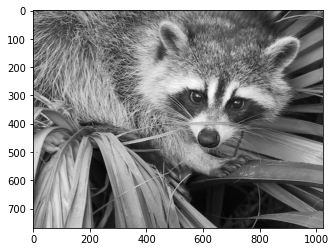

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
face = misc.face(gray=True).astype('int64')
plt.imshow(face, cmap=plt.cm.gray)

In [58]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]])

In [59]:
blurred_face = face.copy()
# This is a showcase. Use `gaussian_filter` or `numpy.convolve` instead
for _ in range(5):
    blurred_face[1:-1, 1:-1] = (face[0:-2, 1:-1] + face[1:-1, 0:-2] + face[2:, 1:-1] + face[1:-1, 2:])/4
    face, blurred_face = blurred_face, face

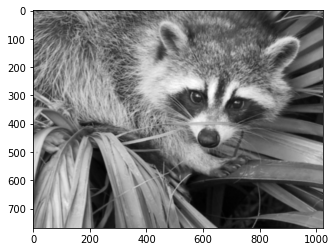

In [60]:
plt.imshow(blurred_face, cmap=plt.cm.gray)

## Iteration
Use slicing and broadcasting. [Iterating](https://numpy.org/doc/stable/reference/arrays.nditer.html) over an array is slow, because we use the Python interpreter!

In [61]:
# wrong!!!
a = np.arange(9).reshape(3,3)
x_size, y_size = a.shape
for i in range(x_size):
    for j in range(y_size):
        print(a[i,j], end=' ')

0 1 2 3 4 5 6 7 8 

In [85]:
# even more wrong !!!
a = np.arange(9).reshape(3,3, order='F')
x_size, y_size = a.shape
for i in range(x_size):
    for j in range(y_size):
        print(a[i,j], end=' ')

0 3 6 1 4 7 2 5 8 

In [62]:
# Not great not terrible
for x in np.nditer(a):
    print(x, end=' ')

0 1 2 3 4 5 6 7 8 

## Numpy's Pitfalls

(only a few examples)

## Types
Numpy uses C-Style types, and **almost** C-Style casts/promotion

In [63]:
np.promote_types(np.int32, np.int64)

dtype('int64')

In [64]:
np.promote_types(np.int32, np.float32)  # In C this should be float32

dtype('float64')

`np.arange` returns different data type, depending on the kind of range.

In [65]:
np.arange(0, 10, 2).dtype

dtype('int64')

In [66]:
np.arange(0, 10, 2.5).dtype

dtype('float64')

## Overflow
Unlike Python's `int` `numpy`'s int will overflow

In [67]:
a = np.zeros(3, dtype=np.int8)
a

array([0, 0, 0], dtype=int8)

In [68]:
a += 127
a

array([127, 127, 127], dtype=int8)

In [69]:
a += 1
a

array([-128, -128, -128], dtype=int8)

## Stuff to Avoid

NumPy has some cruft left over due to backwards compatibility. There are some edge cases when you would (maybe) use these things (but probably not). In general, avoid them:

- np.chararray: use an np.ndarray with unicode dtype
- np.MaskedArrays: use a boolean advanced index
- np.matrix: use a 2-dimensional np.ndarray

## Not mentioned
- loading data
- np.sort, np.unique, np.roll, ...
- Array composition and decomposition np.split, np.stack
- a lot!

# scipy
- collection of algorithms and functions build on top of numpy
- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fft)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse eigenvalue problems with ARPACK
- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
- Spatial data structures and algorithms (scipy.spatial)
- Statistics (scipy.stats)
- Multidimensional image processing (scipy.ndimage)
- File IO (scipy.io)

TLDR: `numpy` handles the array and some basic stuff. `scipy` has all the linear algebra features.

In [70]:
from scipy import linalg

In [71]:
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [72]:
linalg.det(a)

-2.0

In [73]:
linalg.inv(a)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [74]:
linalg.lu(a)

(array([[0., 1.],
        [1., 0.]]),
 array([[1., 0.],
        [0., 1.]]),
 array([[2., 3.],
        [0., 1.]]))

# Behind numpy & scipy
`numpy` and `scipy` use `blas` and `lapack`. What kind depends on your installation.

In [82]:
np.show_config()

blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
Supported SIMD extensions in this NumPy install:
    baseline = SSE,SSE2,SSE3
    found = SSSE3,SSE4

### intel-numpy
- Uses intel's Math Kernel Library

### cupy
- [Dropin](https://docs.cupy.dev/en/stable/reference/comparison.html) replacement for gpu

# matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

[Examples](https://matplotlib.org/stable/plot_types/index.html)

## alternatives
- Seaborn - statistical data visualization
- Plotly - interactive, publication-quality graphs
- Bokeh - interactive visualizations for modern web browsers
- Altair - declarative Visualization

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

## Simple Examples

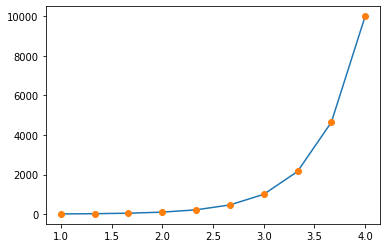

In [76]:
plt.plot(np.linspace(1, 4, 10), np.logspace(1, 4, 10))
plt.plot(np.linspace(1, 4, 10), np.logspace(1, 4, 10), 'o')
plt.show()

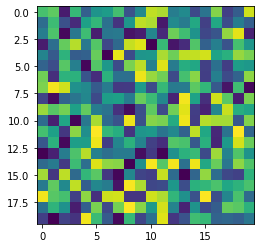

In [77]:
plt.imshow(np.random.rand(20,20))
plt.show()

# Example

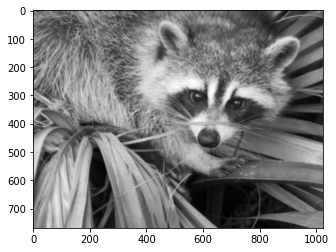

In [78]:
racoon = misc.face(gray=True).astype('float64')
plt.imshow(face, cmap=plt.cm.gray)

In [79]:
def compress(picture, k):
    u, s, vh = np.linalg.svd(picture)
    return u[:,:k], s[:k], vh[:k,:]

In [80]:
def from_compressed(u, s, vh):
    return u @ np.diag(s) @ vh

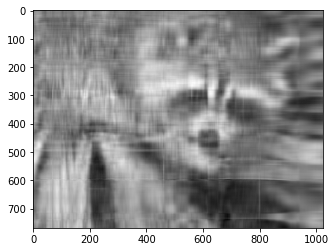

In [81]:
plt.imshow(from_compressed(*compress(racoon, 10)), cmap='gray')

## Further Resources
- [Numpy Docs](https://numpy.org/doc/stable/index.html)
- [Numpy Reference](https://numpy.org/doc/stable/reference/index.html#reference)
- [Scipy Docs](https://scipy.github.io/devdocs/index.html)
- [Scipy Lecture Notes](http://scipy-lectures.org/)
- [From Python to Numpy/](https://www.labri.fr/perso/nrougier/from-python-to-numpy/)